#ML4Net - Lab 2

## Team members

Javier González Otero (243078) | Jordi Guillén González (253027) | David Sánchez Maldonado (253798)

## Description

In this lab, you will implement an ML model that detects congestion in Wi-Fi networks. In particular, you will desing and implement a supervised learning model (e.g., linear regression, multi-layer perceptron, neural network), which you will train using a dataset that was generated using the ns-3 simulator.

Each row in the dataset is organized as (x1, x2, ..., x26, y1, y2, ..., y26, s, r, l), where:

* `x1, x2..., x26, y1, y2, ..., y26` represent the histogram of the Inter-Frame Space (IFS) values for M frames that accessed the medium in a 60 seconds observation sample.
  * `x26` represents the maximum IFS duration (in ms) in the considered M frames whereas `x1` is `x26`/26
  * The remaining `xi` values are buckets at uniform spacing between `x1` and `x26`.
  * For i>1, the values of `yi` represent the IFS histogram count (in percentage) for a corresponding bucket interval between `xi`-1 and `xi`.
  * In the case of `y1`, the bucket interval is between 0 and `x1`
* `s` is the average IFS duration (in ms)
* `r` is the percentage of frame collisions
* `l` is the label, where 1 indicates that the network is saturated, and 0, that it is not

Original dataset: https://ieee-dataport.org/documents/dataset-identification-saturated-and-unsaturated-wi-fi-networks

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   Submission deadline: 1 June 2025 (EoB).

## Setting up the environment

1. Connect your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Download the dataset

In [ ]:
!wget https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/dataset_Lab2.zip

--2025-05-21 16:52:09--  https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/dataset_Lab2.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/refs/heads/master/files/dataset_Lab2.zip [following]
--2025-05-21 16:52:10--  https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/refs/heads/master/files/dataset_Lab2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1803279 (1.7M) [application/zip]
Saving to: ‘dataset_Lab2.zip’

dataset_Lab2.zip    100%[===================>]   1.72M  --.-KB/s    in 0.09s   

2025-05-21 16:52:10 (18.2 MB/

3. Define the main path of the code

In [ ]:
mypath="drive/MyDrive/AAX/Lab2"

4. Extract the source code to the destination folder

In [ ]:
mkdir $mypath; cp dataset_Lab2.zip $mypath; cd $mypath; unzip dataset_Lab2.zip

Archive:  dataset_Lab2.zip
  inflating: test_data.csv           
  inflating: __MACOSX/._test_data.csv  
  inflating: train_data.csv          
  inflating: __MACOSX/._train_data.csv  


## Visualizing the data




       0       1       2       3       4       5       6       7       8   \
0  0.0065  0.0130  0.0195  0.0260  0.0325  0.0390  0.0455  0.0520  0.0585   
1  0.0263  0.0526  0.0789  0.1052  0.1316  0.1579  0.1842  0.2105  0.2368   
2  0.0176  0.0352  0.0528  0.0704  0.0881  0.1057  0.1233  0.1409  0.1585   
3  0.0222  0.0444  0.0666  0.0888  0.1110  0.1332  0.1554  0.1776  0.1998   
4  0.0189  0.0379  0.0568  0.0758  0.0947  0.1137  0.1326  0.1516  0.1705   

       9   ...      45      46      47      48      49      50      51  \
0  0.0650  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
1  0.2631  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
2  0.1761  ...  0.0316  0.0368  0.0312  0.0312  0.0316  0.0299  0.0304   
3  0.2220  ...  0.0316  0.0307  0.0312  0.0000  0.0360  0.0364  0.0304   
4  0.1895  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   

       52      53  54  
0  0.0604  0.9960   1  
1  0.0604  0.9960   1  
2  0.0604  0.9957   

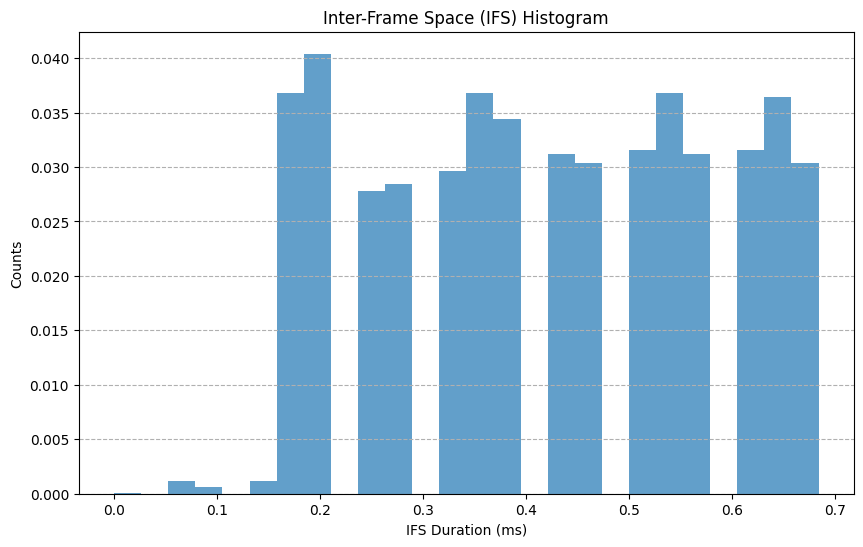

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_ifs_histogram(data_row):
    """
    Plots the Inter-Frame Space (IFS) histogram from a single row of the dataset.

    Args:
        data_row (list or numpy.ndarray): A list or array representing a single row
                                          in the format (x1, ..., x26, y1, ..., y26, s, r, l).
    """

    # Get IFS values and the corresponding counts
    x_values = np.array(data_row[:26])
    y_counts = np.array(data_row[26:52])

    # Calculate the bin edges based on x_values
    bin_edges = [0] + list(x_values)

    # Create the histogram plot
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], y_counts, width=np.diff(bin_edges)[0], align='edge', alpha=0.7)

    # Add labels and title
    plt.xlabel("IFS Duration (ms)")
    plt.ylabel("Counts")
    plt.title("Inter-Frame Space (IFS) Histogram")
    plt.grid(axis='y', linestyle='--')

    # Show the plot
    plt.show()

# Example usage

# -> Read the data file
file_name = mypath + '/train_data.csv'
train_data_df = pd.read_csv(file_name, header=None)
print(train_data_df.head())

# -> Get a sample from the dataset and plot it
row_index = 1
sample_data = train_data_df.iloc[row_index].values
plot_ifs_histogram(sample_data)

## EXERCISES

### Exercise 1:
Define an approach for training and validating the model you are going to train with the proposed data. Then, perform the split accordingly.

In [ ]:
# (response to exercise 1)
from sklearn.model_selection import train_test_split

# Split into train and test sets
X = train_data_df.iloc[:, :-1].values
y = train_data_df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

### Exercise 2:

Define your ML model, so that it can be called for training and test. Examples of approaches that you could use (but not limited to):

*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Decision Trees or Random Forests
*   Convolutional Neural Network (CNN)

In [ ]:
# (response to exercise 2)

#De momento tiro por logistic regression, pero si sabéis algún modelo mejor se cambia.

### Exercise 3:

Define the hyperparameters that you will use to train the model.

In [ ]:
# (response to exercise 3)
'''
penalty=l1: good for feature selection.
solver=liblinear: since the dataset is not so big, is a good selection for this case. It is also good when used with Lasso penalty (l1).
max_iter=100: This is the value by default, but it is enough to don't overfit.
C=2: we overfit a bit more than by default (1), but it works better in the test set.
'''

### Exercise 4:
Train the model and show the procedure (e.g., evolution of the training/validation loss).

In [ ]:
# (response to exercise 4)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the Logistic Regression model
# You can adjust hyperparameters like 'C', 'penalty', etc.
model = LogisticRegression(random_state=42, solver='liblinear', max_iter=100, penalty="l1", C=2) # Using liblinear solver as it works well for small datasets

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')

### Exercise 5:

Select and define the most appropriate evaluation metric(s). Discuss the appropriateness of your evaluation metrics for the binary classification problem we are considering.

In [ ]:
# (response to exercise 5)
'''
Binary CE(lo propongo por una de las slides de MLOps que hay una tabla
y pone que es buena para binary classification): Mide las diferencias entre
predicciones y la realidad. Cuanto menor sea, mejor

Accuracy
Confussion matrix
'''

'\nBinary CE(lo propongo por una de las slides de MLOps que hay una tabla \ny pone que es buena para binary classification): Mide las diferencias entre\npredicciones y la realidad. Cuanto menor sea, mejor\n\nAccuracy\nConfussion matrix\n'

### Exercise 6:

Evaluate your trained model on the test set, using the evaluation metrics that you have proposed. Remember that the test data should have not been seen by the model, so that we can properly estimate of its generalization capabilities.

In [ ]:
from sklearn.metrics import log_loss

# Get the predicted probabilities for the test set
# The model.predict_proba() method returns probabilities for each class
# We need the probability of the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute the binary cross-entropy (log loss)
binary_ce = log_loss(y_test, y_pred_proba)

# Print the binary cross-entropy
print("Binary Cross-Entropy (Log Loss):", binary_ce)

Binary Cross-Entropy (Log Loss): 0.07363750876554706


In [ ]:
# (response to exercise 6)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.9775

Confusion Matrix:
 [[1957   25]
 [  65 1953]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1982
           1       0.99      0.97      0.98      2018

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

